In [1]:
import os

# install scikit image: sudo pip install -U scikit-image
from skimage.transform import resize
from skimage import io
from skimage import color
from skimage.filters import threshold_mean

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# get file names in folder
directory = 'img/1/' # directory of images
file_names = []
for f in os.listdir(directory):
    file_names.append(f)

In [5]:
# load images
images = []
for f in file_names:
    try:
        images.append(io.imread(directory + f, as_grey=True))
    except IOError:
        pass
    except ValueError:
        pass

In [6]:
# resize images
resize_width = 150
resize_height = 150
resized_images = []
for img in images:
    threshold = threshold_mean(img)
    img = img > threshold
    img = img.astype(float)
    resized_images.append(resize(img, (resize_width, resize_height), mode='edge').round())
del images # deleting original images to save memory

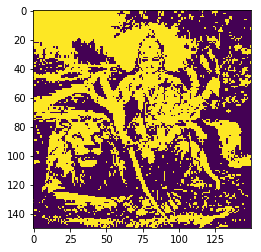

In [9]:
# test a resized image
imgplot = plt.imshow(resized_images[60])
plt.show()

In [10]:
# save resized images
for i in range(len(resized_images)):
    io.imsave('resized_images/img'+ str(i) + '.png', resized_images[i])

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


IOError: [Errno 2] No such file or directory: 'resized_images/img0.png'

In [11]:
# flatten arrays
flattened_images = []
for i in range(len(resized_images)):
    flattened_images.append(resized_images[i].flatten())
flattened_images = np.array(flattened_images)

In [12]:
flattened_images.shape

(952,)

when ploting, we can resize flattened images as img.reshape((width, height)) to get the original image.

In [33]:
# write to csv
df_images = pd.DataFrame(flattened_images)
df_images.to_csv('ganesh_preproecessed_images.csv', header=False, index=False)

In [39]:
# with numpy
np.savetxt('ganesh_numpy.csv', flattened_images, fmt='%i', delimiter=',')

(11, 90000)

## Try tensorflow

In [10]:
import tensorflow as tf

In [19]:
directory = 'resized_images/' # directory of images
file_names = []
for f in os.listdir(directory):
    file_names.append(directory+f)


In [20]:
def decode_image(image_file_names, resize_func=None):
    
    images = []
    
    graph = tf.Graph()
    with graph.as_default():
        file_name = tf.placeholder(dtype=tf.string)
        file = tf.read_file(file_name)
        image = tf.image.decode_png(file)
        if resize_func != None:
            image = resize_func(image)
    
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()   
        for i in range(len(image_file_names)):
            images.append(session.run(image, feed_dict={file_name: image_file_names[i]}))
            if (i+1) % 1000 == 0:
                print('Images processed: ',i+1)
        
        session.close()
    
    return images

In [21]:
images = decode_image(file_names)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [24]:
images[0].shape

(300, 300, 1)